In [123]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
# from typen import enforce_type_hints

In [135]:
class Prediction:
    def __init__(self):
        pass
    # load data (data) # set data
    # fit (parameters)
    # predict -> get result
    # visualize


In [133]:
#
class WeatherData:
    conn = None
    weather = None
#     @enforce_type_hints
    def __init__(self, db_name: str) -> pd.core.frame.DataFrame:
        self.conn = sql.connect(db_name)
    def select_all(self, table_name: str):
        self.weather = pd.read_sql(f'SELECT * FROM {table_name}', self.conn)
        self.weather['index'] = pd.to_datetime(self.weather['index'], dayfirst=True)
        self.weather.index = self.weather['index']
        self.weather = self.weather.drop(columns=['index'])
        return self.weather
    def mean_by(self, month: bool = True, year: bool = False) -> pd.core.frame.DataFrame:
        if self.weather is None:
            raise Exception('You must call select_all for set table name first')
        if month == True:
            return self.weather.groupby(by=self.weather.index.month).mean().head()['T']
        if year == True:
            return self.weather.groupby(by=self.weather.index.year).mean().head()['T']
    @staticmethod
    def bar_chart(data: pd.core.frame.DataFrame) -> None:
        display(data.plot(kind='bar'))
        
    @staticmethod    
    def print_head(table: pd.core.frame.DataFrame, count: int = 5) -> None:
        display(table.head(count))

In [ ]:
class AggData:
    def __init__(self):
        pass
    def ex():
        pass

,T,T_a,DD,Ff,N,Nh,Cl,Po,U,Ch,...,RRR,DD_,diff,abs_diff,T_kal,T_sher,T_sar,three_mean,diff_3,abs_diff_3
index,,,,,,,,,,,,,,,,,,,,,
2012-11-01 00:00:00,-1.9,-6.0,"Ветер, дующий с северо-запада",3.0,0.0,NaN,None,763.7,75.0,None,...,None,North,4.1,4.1,-4.8,-4.0,-4.0,-4.266667,2.366667,2.366667
2012-11-01 03:00:00,-3.7,-7.0,"Ветер, дующий с северо-запада",2.0,10.0,10.0,"Слоисто-кучевых, слоистых, кучевых или кучево-...",764.9,83.0,"Перистых, перисто-кучевых или перисто-слоистых...",...,None,North,3.3,3.3,-5.4,-5.8,-4.7,-5.300000,1.600000,1.600000


Средняя температура по месяцам:


<AxesSubplot:xlabel='index'>

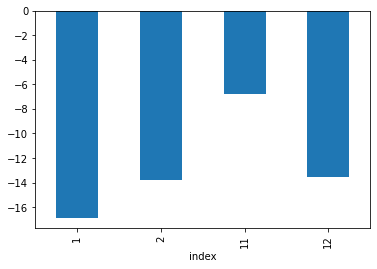

In [134]:
wd = WeatherData('weather.db')
wd.print_head(wd.select_all('df_merged'), 2)
print('Средняя температура по месяцам:')
wd.mean_by()
wd.bar_chart(wd.mean_by())